<b>Tide Data Gaps Analysis for a Specific Station and Specific Sensor</b>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 

In [81]:
# Loading time series tide data into a Pandas Data Frame 

data = pd.read_csv("AerialBay_PRS_2015.csv", parse_dates=True)
data.columns = ['Date_and_Time', 'Tide']
data['Date_and_Time'] = pd.to_datetime(data['Date_and_Time'], format = "%m-%d-%Y %H:%M")
data = data.sort_values(by = "Date_and_Time")


ValueError: time data '13-04-2015 00:00' does not match format '%m-%d-%Y %H:%M' (match)

In [80]:
data.set_index('Date_and_Time', inplace=True)

In [76]:
# Resample the data to 1-minute interval
data_resampled = data.resample('1T').mean()  # Use '1T' for 1-minute interval

# Identify missing data gaps
idx = pd.date_range(start=data_resampled.index.min(), end=data_resampled.index.max(), freq='1T')
missing_dates = idx[~idx.isin(data_resampled.index)]

# Fill or interpolate missing values
data_filled = data_resampled.ffill().bfill()  # Forward-fill and backward-fill
# Alternatively, you can use linear interpolation:
# df_interpolated = df_resampled.interpolate(method='linear')

mean_tide = data['Tide'].mean()
# Print the missing dates
print("Missing data gaps:")
for date in missing_dates:
    print(date)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

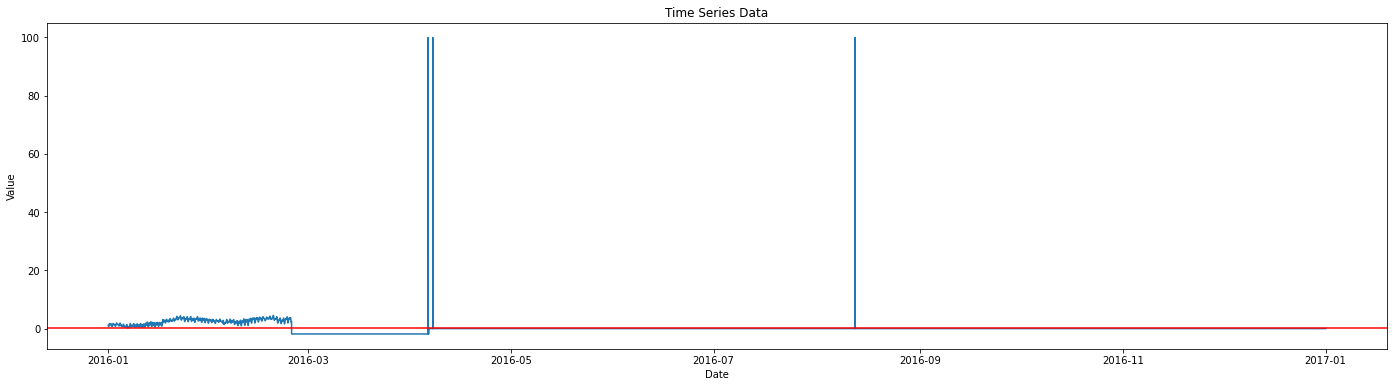

In [70]:
plt.figure(figsize=(24,6))
plt.plot(data['Tide'])
plt.title('Time Series Data')
plt.axhline(y = mean_tide, color = 'r', linestyle = '-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

plt.show()

In [71]:
data.describe()


,Dummy_idx,Tide
count,521589.0,521589.000000
mean,52.0,0.155364
std,0.0,1.249628
min,52.0,-1.855000
25%,52.0,0.000000
50%,52.0,0.000000
75%,52.0,0.000000
max,52.0,100.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8536 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tide    8536 non-null   float64
dtypes: float64(1)
memory usage: 133.4 KB


In [51]:
data.tail()

,Tide
Date_and_Time,
2016-12-31 19:00:00,0.837
2016-12-31 20:00:00,0.946
2016-12-31 21:00:00,1.043
2016-12-31 22:00:00,1.108
2016-12-31 23:00:00,1.127
